Type of Employment             7270
Property Age                   4850
Income (USD)                   4576
Dependents                     2493
Credit Score                   1703
Income Stability               1683
Has Active Credit Card         1566
Property Location               356
Loan Sanction Amount (USD)      340
Current Loan Expenses (USD)     172
Gender                           53
Age                               0
Profession                        0
Customer ID                       0
Name                              0
Location                          0
No. of Defaults                   0
Expense Type 2                    0
Loan Amount Request (USD)         0
Expense Type 1                    0
Property Type                     0
Property ID                       0
Co-Applicant                      0
Property Price                    0
dtype: int64


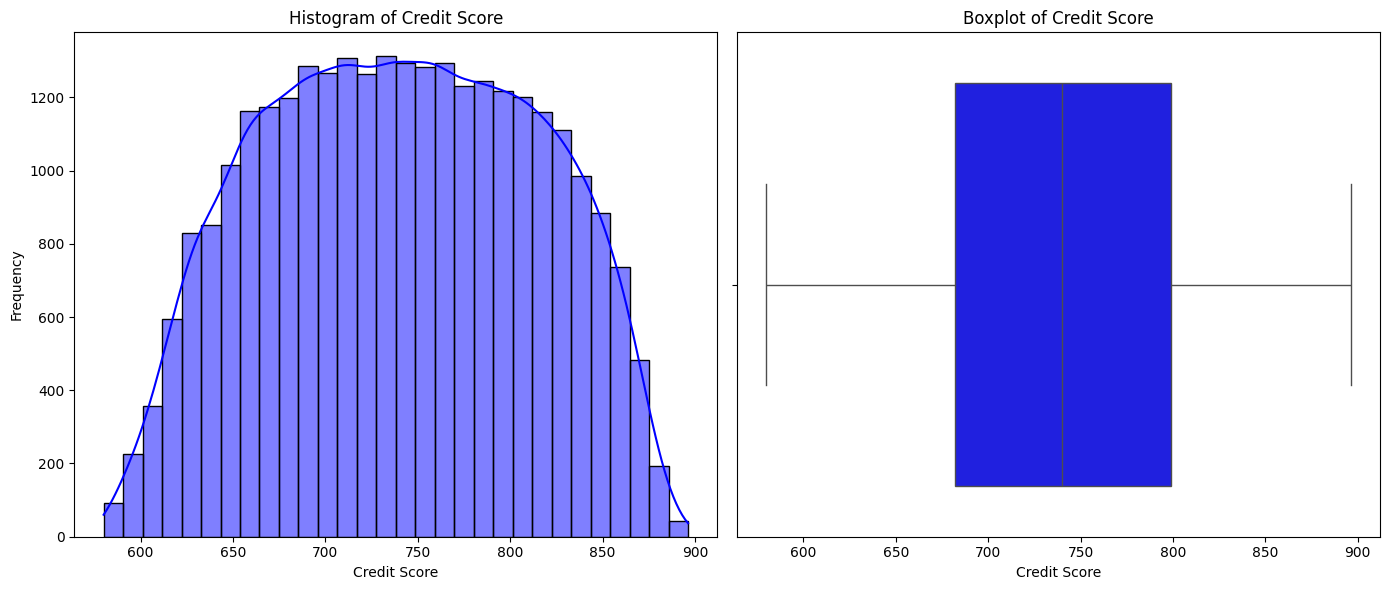

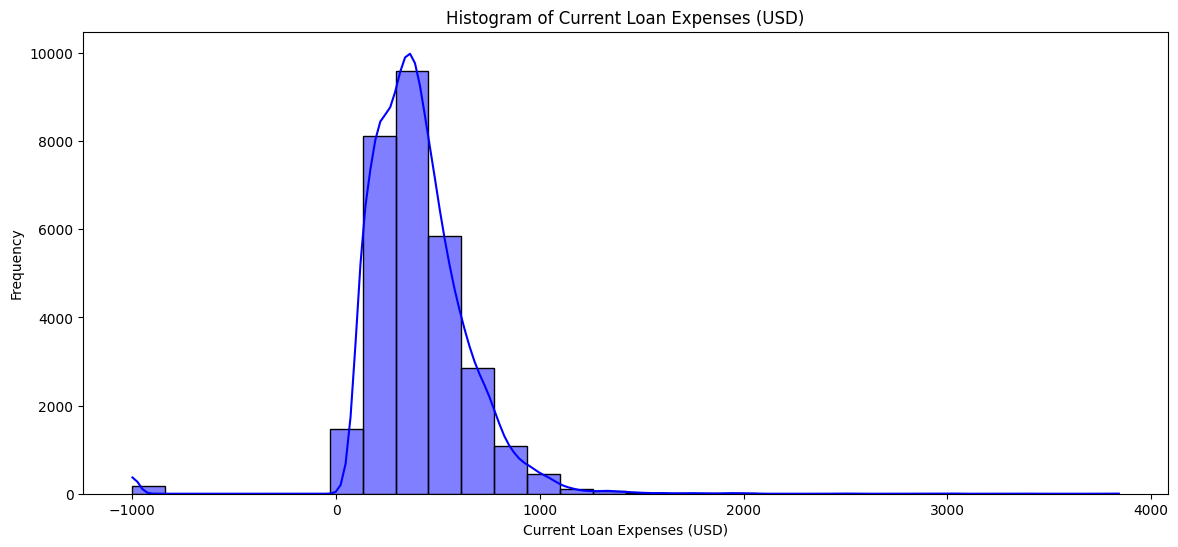

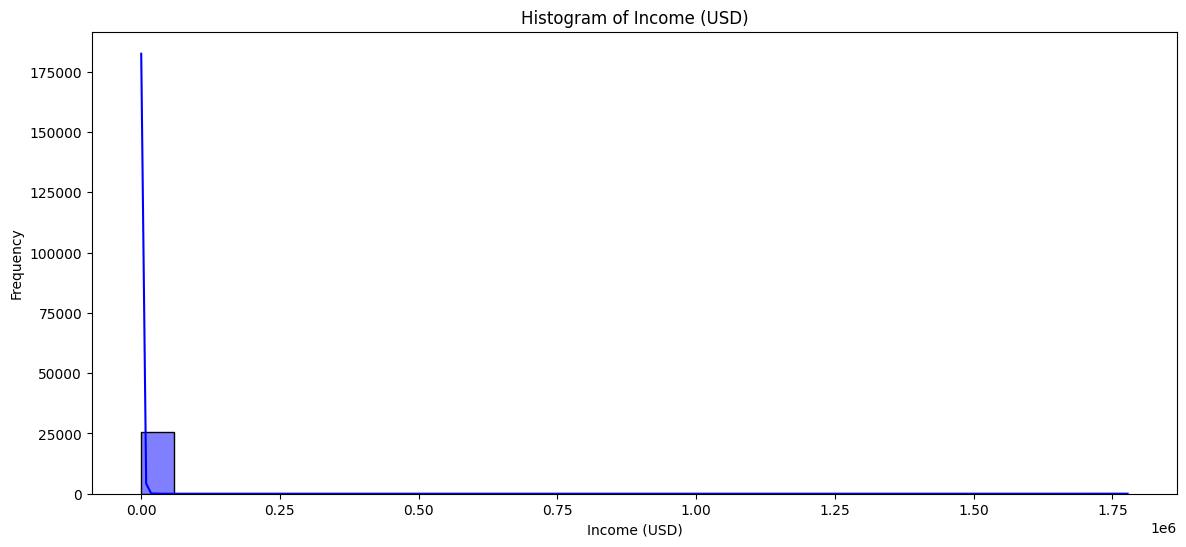

New CSV file with null values removed has been created: Loan_null_removed.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the original CSV file
df = pd.read_csv('Loan_dataset .csv')

# Create a copy of the dataframe to fill null values
df_filled = df.copy()

# Identify columns with null values and their counts
null_counts = df.isnull().sum().sort_values(ascending=False)
print(null_counts)

# Fill null values with appropriate methods
df_filled['Dependents'] = df_filled['Dependents'].fillna(value=0)
df_filled['Loan Sanction Amount (USD)'] = df_filled['Loan Sanction Amount (USD)'].interpolate(method='linear')

# Plotting the histogram and boxplot for Credit Score to check for skewness
plt.figure(figsize=(14, 6))
# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['Credit Score'].dropna(), kde=True, bins=30, color='blue')
plt.title('Histogram of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Credit Score'].dropna(), color='blue')
plt.title('Boxplot of Credit Score')
plt.xlabel('Credit Score')
plt.tight_layout()
plt.show()

# Fill null values for Credit Score using mean
df_filled['Credit Score'] = df_filled['Credit Score'].fillna(df_filled['Credit Score'].mean())

# Fill null values for Property Location using mode
df_filled['Property Location'] = df_filled['Property Location'].fillna('Undisclosed')

# Plotting the histogram for Current Loan Expenses
plt.figure(figsize=(14, 6))
sns.histplot(df['Current Loan Expenses (USD)'].dropna(), kde=True, bins=30, color='blue')
plt.title('Histogram of Current Loan Expenses (USD)')
plt.xlabel('Current Loan Expenses (USD)')
plt.ylabel('Frequency')
plt.show()

# Fill null values for Current Loan Expenses using median
df_filled['Current Loan Expenses (USD)'] = df_filled['Current Loan Expenses (USD)'].fillna(df_filled['Current Loan Expenses (USD)'].median())

# Plotting the histogram for Income (USD)
plt.figure(figsize=(14, 6))
sns.histplot(df['Income (USD)'].dropna(), kde=True, bins=30, color='blue')
plt.title('Histogram of Income (USD)')
plt.xlabel('Income (USD)')
plt.ylabel('Frequency')
plt.show()

# Fill null values for Income (USD) using median
df_filled['Income (USD)'] = df_filled['Income (USD)'].fillna(df_filled['Income (USD)'].median())

# Define the mapping based on the Profession
employment_mapping = {
    'Student': 'Free Lancer',
    'Commerical associate': 'Private Employee',
    'Unemployed': 'Not Working',
    'state servant': 'Government Servant',
    'Maternity leave': 'Unknown',
    'Pensioner': 'Retired',
    'Working': 'Unspecified',
    'Buiesnessman': 'self employed'
}

# Function to apply the mapping and capitalize the first letter of each word
def map_employment_and_title_case(row):
    if pd.isnull(row['Type of Employment']):
        profession = row['Profession']
        if isinstance(profession, str):
            mapped_value = employment_mapping.get(profession.lower(), 'Unspecified')
            if isinstance(mapped_value, str):
                return mapped_value.title()
        return 'Unspecified'
    return row['Type of Employment']

# Apply the mapping function to 'Type of Employment' column
df_filled['Type of Employment'] = df_filled.apply(map_employment_and_title_case, axis=1)

# Fill other categorical null values
df_filled['Has Active Credit Card'] = df_filled['Has Active Credit Card'].fillna('Not Active')
df_filled['Income Stability'] = df_filled['Income Stability'].fillna('Unrecorded')
df_filled['Property Age'] = df_filled['Property Age'].fillna(df_filled['Income (USD)'].mean())

# Drop rows where 'Gender' column has null values
df_filled = df_filled.dropna(subset=['Gender'])

# Save the new dataframe with filled null values to a new CSV file
df_filled.to_csv('Loan_null_removed.csv', index=False)

print("New CSV file with null values removed has been created: Loan_null_removed.csv")


In [3]:
#Handling the outliers

# Load the new CSV file with null values removed
df_cleaned = pd.read_csv('Loan_null_removed.csv')

# Identify numerical columns
numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Function to handle outliers by replacing them with the mean value
def handle_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        mean_value = df[col].mean()
        
        df[col] = df[col].apply(lambda x: mean_value if x < lower_bound or x > upper_bound else x)
    return df

# Handle outliers in the cleaned dataframe
df_cleaned = handle_outliers_iqr(df_cleaned, numerical_columns)

# Define the numerical column for outlier detection and handling
numerical_columns_for_detection = [
    'Credit Score', 'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
    'Property ID', 'Property Age', 'Property Type', 'Loan Sanction Amount (USD)', 'Co-Applicant'
]

for numerical_column in numerical_columns_for_detection:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the numerical column
    Q1 = df_cleaned[numerical_column].quantile(0.25)
    Q3 = df_cleaned[numerical_column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for detecting outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = df_cleaned[(df_cleaned[numerical_column] < lower_bound) | (df_cleaned[numerical_column] > upper_bound)]

    # Display the outliers
    print(f"Outliers in {numerical_column}:")
    print(outliers)

    # Remove outliers
    df_cleaned = df_cleaned[(df_cleaned[numerical_column] >= lower_bound) & (df_cleaned[numerical_column] <= upper_bound)]

# Save the final cleaned dataframe with outliers handled to a new CSV file
df_cleaned.to_csv('Loan_final_cleaned.csv', index=False)

print("Final cleaned CSV file with null values removed and outliers handled has been created: Loan_final_cleaned.csv")


Outliers in Credit Score:
Empty DataFrame
Columns: [Customer ID, Name, Gender, Age, Income (USD), Income Stability, Profession, Type of Employment, Location, Loan Amount Request (USD), Current Loan Expenses (USD), Expense Type 1, Expense Type 2, Dependents, Credit Score, No. of Defaults, Has Active Credit Card, Property ID, Property Age, Property Type, Property Location, Co-Applicant, Property Price, Loan Sanction Amount (USD)]
Index: []

[0 rows x 24 columns]
Outliers in Loan Amount Request (USD):
      Customer ID              Name Gender  Age  Income (USD)  \
29        C-39879  Thea Rodenberger      M   29   3880.490000   
285       C-19195       Kena Ankrom      F   19   2568.788098   
298       C-33465       Cami Wymore      F   55   3065.860000   
304        C-1050      Yang Saylors      F   23   2577.920000   
327        C-1990   Marlena Tibbets      F   45   4100.410000   
...           ...               ...    ...  ...           ...   
29502       C-818     Jenni Hargett      

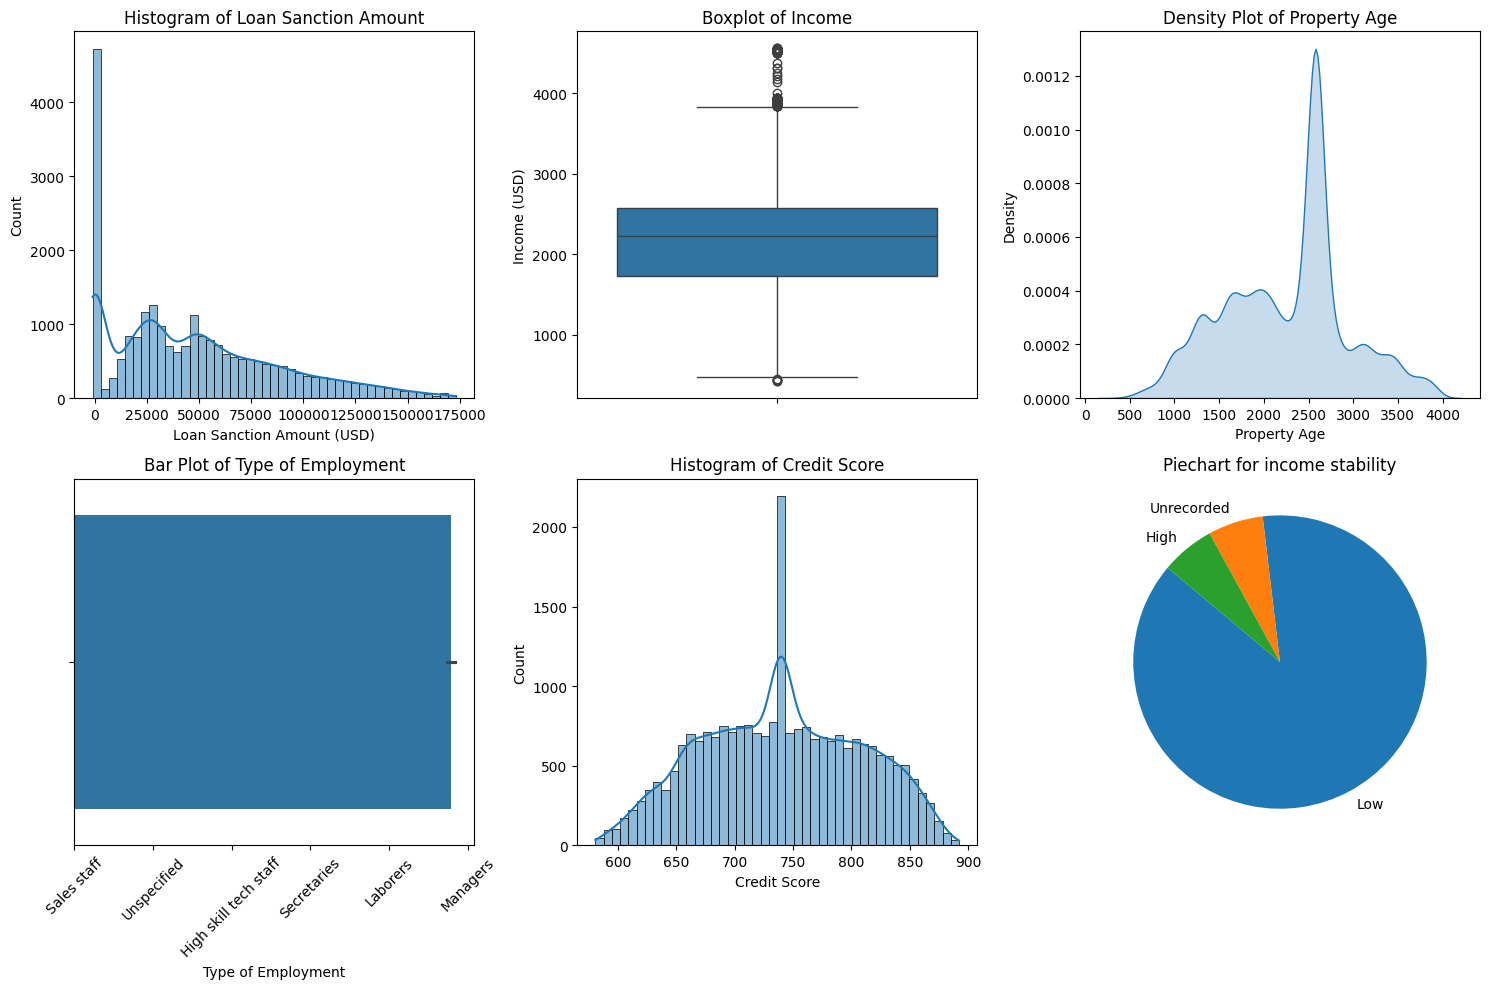

In [33]:
#univar analysis

df= pd.read_csv('Loan_final_cleaned.csv')

plt.figure(figsize=(15, 10))

# Histogram for Loan Sanction Amount
plt.subplot(2, 3, 1)
sns.histplot(df['Loan Sanction Amount (USD)'], kde=True)
plt.title('Histogram of Loan Sanction Amount')

# Boxplot for Income
plt.subplot(2, 3, 2)
sns.boxplot(y=df['Income (USD)'])
plt.title('Boxplot of Income')

# Density Plot for Property Age
plt.subplot(2, 3, 3)
sns.kdeplot(df['Property Age'], fill=True)
plt.title('Density Plot of Property Age')

# Bar Plot for Type of Employment  
plt.subplot(2, 3, 4)
sns.barplot(x='Type of Employment', data=df)
plt.title('Bar Plot of Type of Employment')
plt.xticks(rotation=45)

# Histogram for Credit Score
plt.subplot(2, 3, 5)
sns.histplot(df['Credit Score'], kde=True)
plt.title('Histogram of Credit Score')

# Piechart for income stability
plt.subplot(2, 3, 6)
income_stability_counts = df['Income Stability'].value_counts()
plt.pie(income_stability_counts, labels=income_stability_counts.index, startangle=140)
plt.title('Piechart for income stability')

plt.tight_layout()
plt.show()

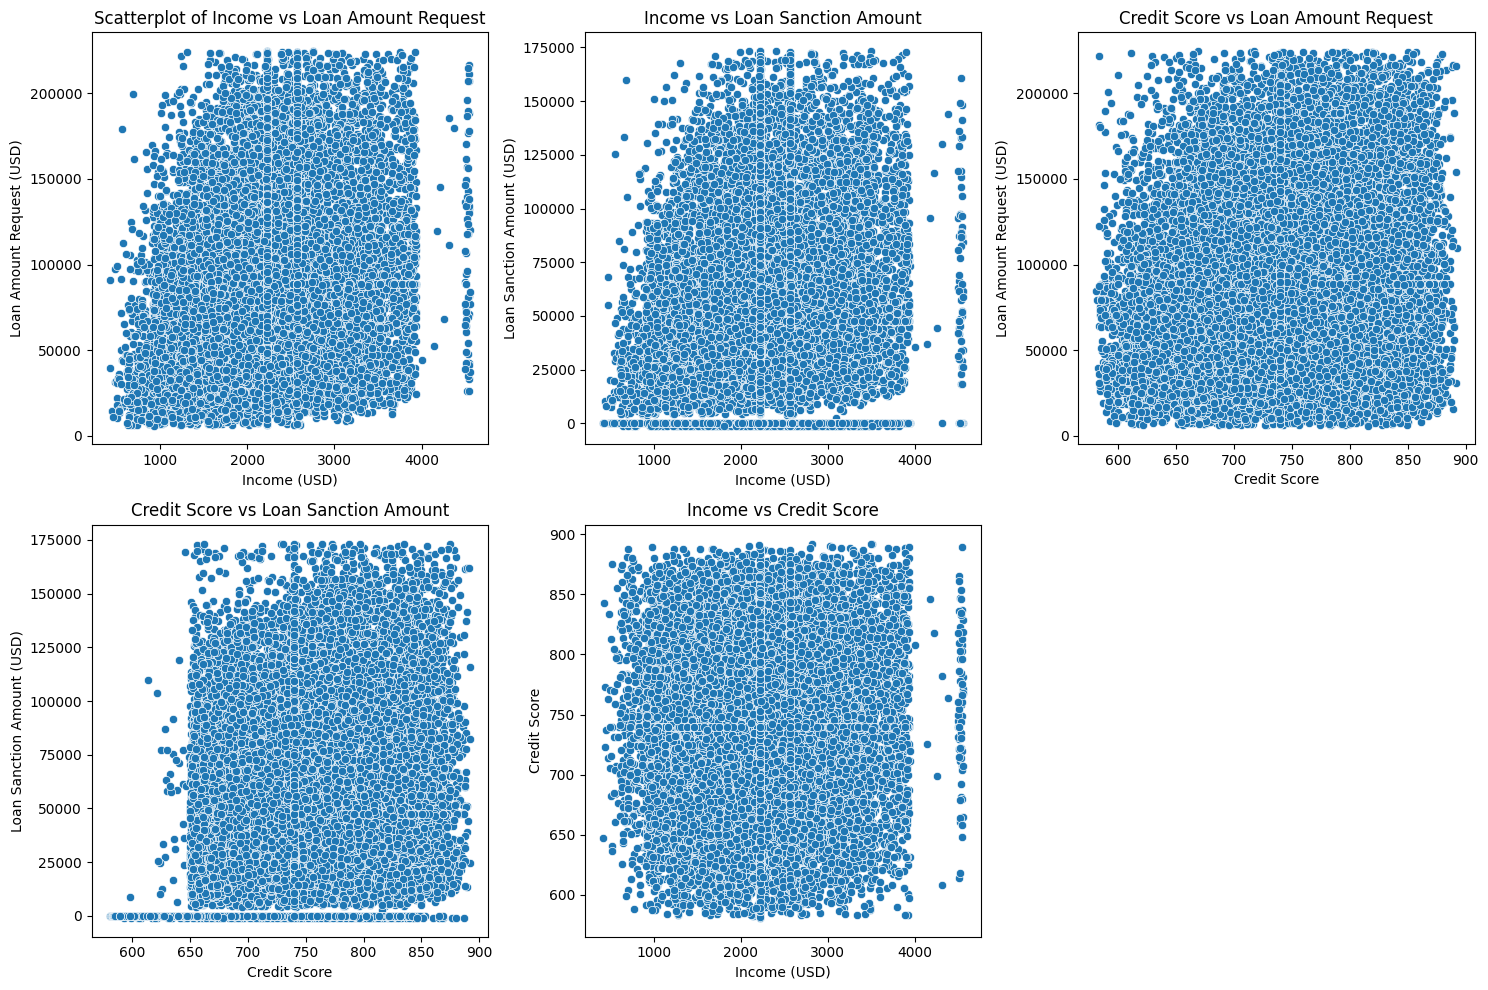

In [34]:
#Bivar analysis

# Load the original CSV file
df = pd.read_csv('Loan_final_cleaned.csv')

plt.figure(figsize=(15, 10))

# Income vs Loan Amount Request
plt.subplot(2, 3, 1)
sns.scatterplot(data=df, x='Income (USD)', y='Loan Amount Request (USD)')
plt.title('Scatterplot of Income vs Loan Amount Request')

# Income vs Loan Sanction Amount
plt.subplot(2, 3, 2)
sns.scatterplot(data=df, x='Income (USD)', y='Loan Sanction Amount (USD)')
plt.title('Income vs Loan Sanction Amount')

# Credit Score vs Loan Amount Request
plt.subplot(2, 3, 3)
sns.scatterplot(data=df, x='Credit Score', y='Loan Amount Request (USD)')
plt.title('Credit Score vs Loan Amount Request')

# Credit Score vs Loan Sanction Amount 
plt.subplot(2, 3, 4)
sns.scatterplot(data=df, x='Credit Score', y='Loan Sanction Amount (USD)')
plt.title('Credit Score vs Loan Sanction Amount')

# Income vs Credit Score
plt.subplot(2, 3, 5)
sns.scatterplot(data=df, x='Income (USD)', y='Credit Score')
plt.title('Income vs Credit Score')

plt.tight_layout()
plt.show()